In [1]:
from typing import List, Any

from IPython.display import display, Markdown, Latex
from rdflib import Graph, RDF, RDFS, Namespace
from SPARQLWrapper import SPARQLWrapper, JSON
from string import Template

import networkx as nx
import matplotlib.pyplot as plt
#from nxpd import draw

import requests
import json
import io
import time
import csv

In [2]:
G1 = nx.DiGraph()
G1.add_edges_from([("A", "A'"), ("B", "A")])

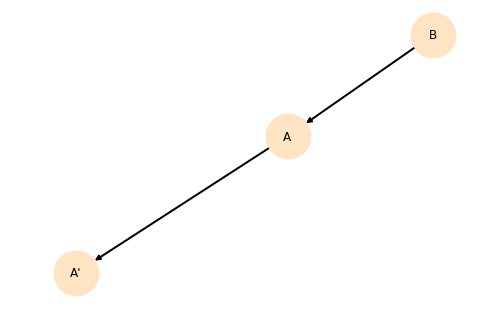

In [3]:
nx.draw_spring(G1, 
               with_labels=True, 
               node_color = 'bisque',
               font_weight='light', 
               node_size = 2000, 
               width = 2)
plt.show()

In [4]:
G2 = nx.DiGraph()
G2.add_edges_from([("B", "B'"), ("B", "B''"), ("A", "A'"), ("B''", "A'")])

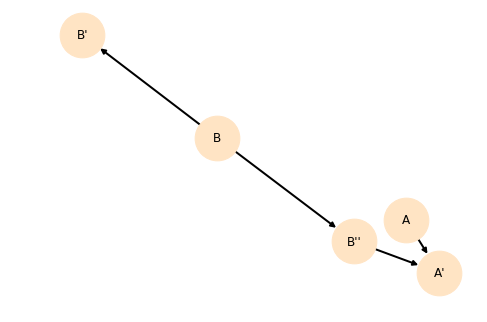

In [5]:
nx.draw_spring(G2, 
               with_labels=True, 
               node_color = 'bisque',
               font_weight='light', 
               node_size = 2000, 
               width = 2)
plt.show()

In [6]:
syn_cache = [{'key':'A', 'synonym':['A\'']}, 
             {'key':'B', 'synonym':['B\'', 'B\'\'']}]

In [7]:
for entry in syn_cache:
    print(str(entry['key']) + ' --> ' + str(entry['synonym']))

A --> ["A'"]
B --> ["B'", "B''"]


In [8]:
def are_synonyms(n, m):
    for entry in syn_cache:
        all_names = entry['synonym'] + [entry['key']]
        if (n in all_names) and (m in all_names):
            return entry['key']

""" Testing the are_synonmys function """
if are_synonyms('A', 'B'):
    print(are_synonyms('A', 'B'))
else:
    print('Not synonyms')
print(are_synonyms("B'", "B''"))
print(are_synonyms("A'", "a"))
print(are_synonyms("A'", "A"))

Not synonyms
B
None
A


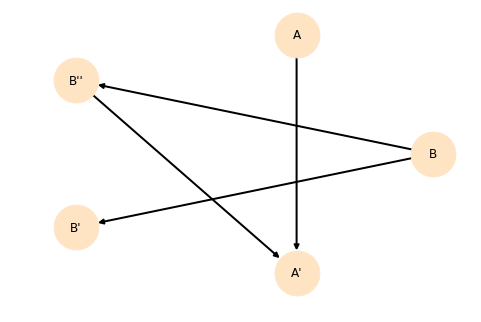

for each B
	for each A
	for each A'
for each A
	for each B
	for each B''
	for each B'
for each B''
	for each B
		B'' is synonym with B
		merging B'' into B
	for each A
	for each B'
		B'' is synonym with B'
		merging B'' into B
	for each A'
for each B'
	for each B
		B' is synonym with B
		merging B' into B
	for each A
	for each A'
for each A'
	for each B
	for each A
		A' is synonym with A
		merging A' into A


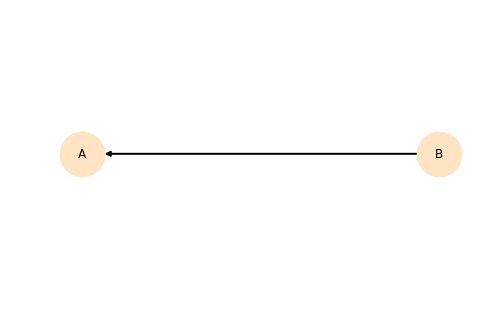

In [9]:
def reg_network_syn_simp(graph):
    H = graph.copy()
    for n in H.nodes():
        print('for each ' + str(n))
        for m in H.nodes():
            if n not in m:
                print('\tfor each ' + str(m))
                key = are_synonyms(n,m)
                if key:
                    if n not in key:
                        print('\t\t' + str(n) + ' is synonym with ' + str(m))
                        print('\t\t' + 'merging ' + str(n) + ' into ' + str(key))
                        try:
                            H = nx.contracted_nodes(H, key, n)
                        except:
                            continue
                    if m not in key:
                        print('\t\t' + 'merging ' + str(m) + ' into ' + str(key))
                        try:
                            H = nx.contracted_nodes(H, key, m)
                        except:
                            continue
    return H

nx.draw_shell(G2, 
               with_labels=True, 
               node_color = 'bisque',
               font_weight='light', 
               node_size = 2000, 
               width = 2)
plt.show()

G3 = reg_network_syn_simp(G2)

nx.draw_shell(G3, 
               with_labels=True, 
               node_color = 'bisque',
               font_weight='light', 
               node_size = 2000, 
               width = 2)
plt.show()